# CIFAR-100 Dataset Exploration

This notebook explores the CIFAR-100 dataset, which consists of 60,000 32x32 color images in 100 classes, with 600 images per class. The 100 classes are grouped into 20 superclasses.

In [1]:
# Add project root to path so we can import from src
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import seaborn as sns
import pandas as pd
from collections import defaultdict
from PIL import Image

# Try to import from our project structure
try:
    from src.data.data_preparation import load_cifar100
except ImportError:
    print("Warning: Unable to import from src.data. Using local implementations.")

# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

## 1. Loading the Dataset

First, let's load the CIFAR-100 dataset and examine its structure.

In [3]:
# Define a function to load CIFAR-100 if the import failed
def load_cifar100_local(batch_size=128, num_workers=2):
    # Define transforms for training data (with augmentation)
    train_transform = transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
    ])
    
    # Define transforms for testing data (no augmentation)
    test_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
    ])
    
    # Load CIFAR-100 dataset
    train_dataset = torchvision.datasets.CIFAR100(
        root='../data', 
        train=True,
        download=True, 
        transform=train_transform
    )
    
    test_dataset = torchvision.datasets.CIFAR100(
        root='../data', 
        train=False,
        download=True, 
        transform=test_transform
    )
    
    # Create data loaders
    train_loader = DataLoader(
        train_dataset, 
        batch_size=batch_size,
        shuffle=True, 
        num_workers=num_workers
    )
    
    test_loader = DataLoader(
        test_dataset, 
        batch_size=batch_size,
        shuffle=False, 
        num_workers=num_workers
    )
    
    # Get class names
    classes = train_dataset.classes
    
    return train_loader, test_loader, classes

In [4]:
# Try to load using our function, fall back to local implementation if it fails
try:
    train_loader, test_loader, classes = load_cifar100(batch_size=64)
    print("Successfully loaded dataset using project module.")
except NameError:
    train_loader, test_loader, classes = load_cifar100_local(batch_size=64)
    print("Loaded dataset using local implementation.")

# Print basic information about the dataset
print(f"Number of training examples: {len(train_loader.dataset)}")
print(f"Number of test examples: {len(test_loader.dataset)}")
print(f"Number of classes: {len(classes)}")
print(f"Batch size: {train_loader.batch_size}")

100%|██████████| 169001437/169001437 [07:27<00:00, 377631.40it/s] 


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified
Successfully loaded dataset using project module.
Number of training examples: 50000
Number of test examples: 10000
Number of classes: 100
Batch size: 64


## 2. Class Information

CIFAR-100 has 100 fine-grained classes that are grouped into 20 superclasses. Let's examine this structure.

In [5]:
# Define CIFAR-100 superclasses
cifar100_superclasses = {
    'aquatic_mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    'food_containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
    'fruit_and_vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
    'household_electrical_devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household_furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large_carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large_man-made_outdoor_things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large_natural_outdoor_scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large_omnivores_and_herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium_mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect_invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small_mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    'vehicles_1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    'vehicles_2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

# Create a mapping from fine class to superclass
fine_to_super = {}
for superclass, fine_classes in cifar100_superclasses.items():
    for fine in fine_classes:
        fine_to_super[fine] = superclass

# Print the classes and their superclasses
for i, class_name in enumerate(classes):
    print(f"{i:3d}: {class_name:15s} (Superclass: {fine_to_super.get(class_name, 'Unknown')})")
    if (i + 1) % 10 == 0:
        print("-" * 60)  # Separator for better readability

  0: apple           (Superclass: fruit_and_vegetables)
  1: aquarium_fish   (Superclass: fish)
  2: baby            (Superclass: people)
  3: bear            (Superclass: large_carnivores)
  4: beaver          (Superclass: aquatic_mammals)
  5: bed             (Superclass: household_furniture)
  6: bee             (Superclass: insects)
  7: beetle          (Superclass: insects)
  8: bicycle         (Superclass: vehicles_1)
  9: bottle          (Superclass: food_containers)
------------------------------------------------------------
 10: bowl            (Superclass: food_containers)
 11: boy             (Superclass: people)
 12: bridge          (Superclass: large_man-made_outdoor_things)
 13: bus             (Superclass: vehicles_1)
 14: butterfly       (Superclass: insects)
 15: camel           (Superclass: large_omnivores_and_herbivores)
 16: can             (Superclass: food_containers)
 17: castle          (Superclass: large_man-made_outdoor_things)
 18: caterpillar     (Superclas

## 3. Visualizing Sample Images

Let's visualize some sample images from the dataset to get a better understanding of the data.

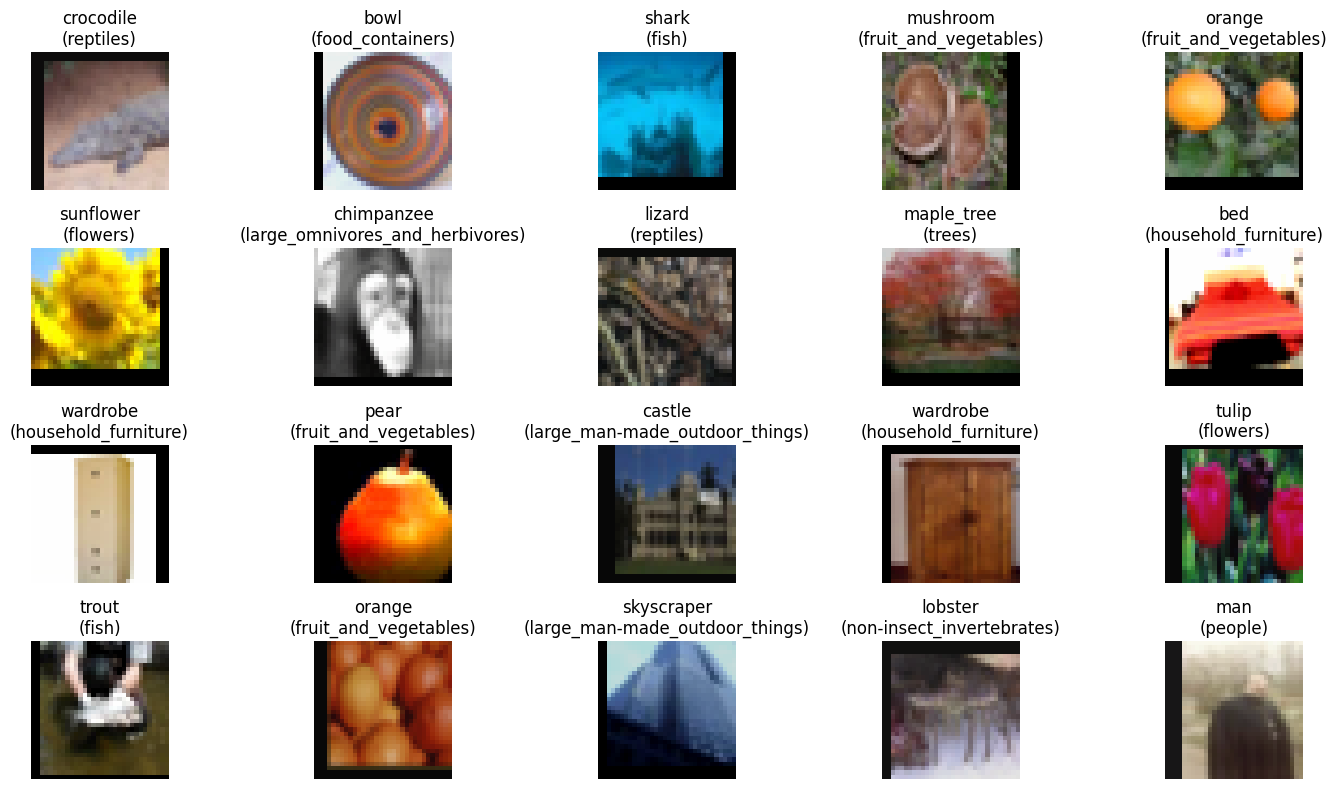

In [6]:
def imshow(img):
    # Unnormalize
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.5071, 0.4867, 0.4408])
    std = np.array([0.2675, 0.2565, 0.2761])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    
    return img

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Create a figure to show images
plt.figure(figsize=(15, 8))
for i in range(20):
    plt.subplot(4, 5, i+1)
    img = imshow(images[i])
    plt.imshow(img)
    class_name = classes[labels[i]]
    superclass = fine_to_super.get(class_name, 'Unknown')
    plt.title(f"{class_name}\n({superclass})")
    plt.axis('off')
plt.tight_layout()
plt.savefig("../results/sample_images.png")
plt.show()

## 4. Class Distribution

Let's check if the classes are balanced in the dataset.

Class distribution summary:
count    100.0
mean     500.0
std        0.0
min      500.0
25%      500.0
50%      500.0
75%      500.0
max      500.0
Name: Count, dtype: float64


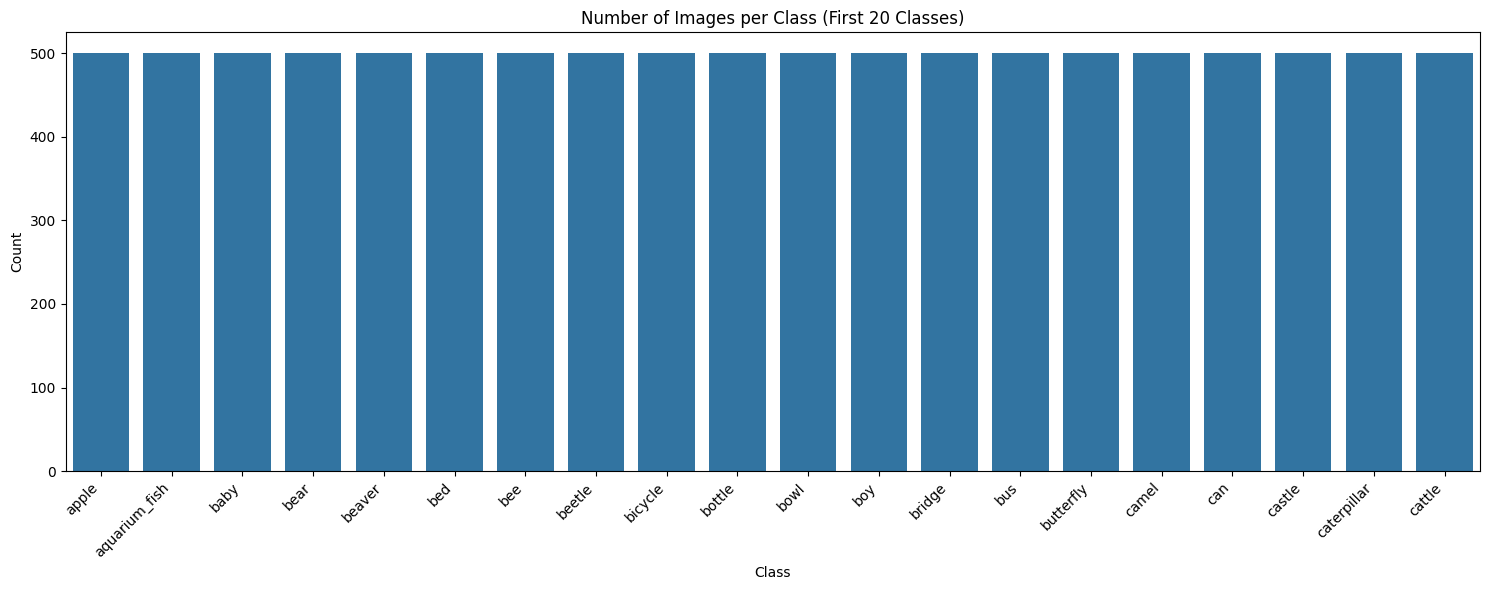

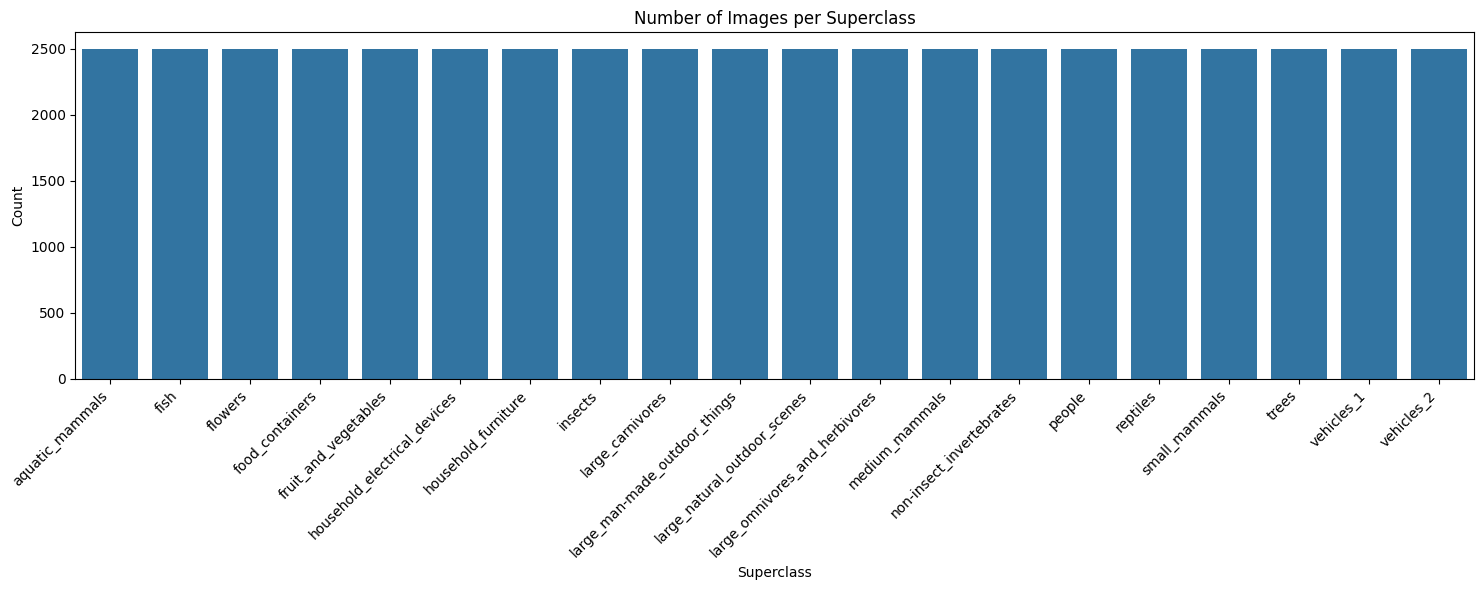

In [7]:
# Count instances per class in training set
class_counts = {i: 0 for i in range(len(classes))}
for _, labels in train_loader:
    for label in labels:
        class_counts[label.item()] += 1

# Convert to DataFrame for better visualization
class_df = pd.DataFrame({
    'Class': [classes[i] for i in class_counts.keys()],
    'Count': list(class_counts.values()),
    'Superclass': [fine_to_super.get(classes[i], 'Unknown') for i in class_counts.keys()]
})

# Print summary statistics
print("Class distribution summary:")
print(class_df['Count'].describe())

# Plot class distribution
plt.figure(figsize=(15, 6))
sns.barplot(x='Class', y='Count', data=class_df.head(20))  # Show first 20 classes
plt.xticks(rotation=45, ha='right')
plt.title('Number of Images per Class (First 20 Classes)')
plt.tight_layout()
plt.savefig("../results/class_distribution.png")
plt.show()

# Plot superclass distribution
superclass_counts = class_df.groupby('Superclass')['Count'].sum().reset_index()
plt.figure(figsize=(15, 6))
sns.barplot(x='Superclass', y='Count', data=superclass_counts)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Images per Superclass')
plt.tight_layout()
plt.savefig("../results/superclass_distribution.png")
plt.show()

## 5. Data Augmentation Visualization

Let's visualize how different data augmentation techniques affect the images.

Files already downloaded and verified


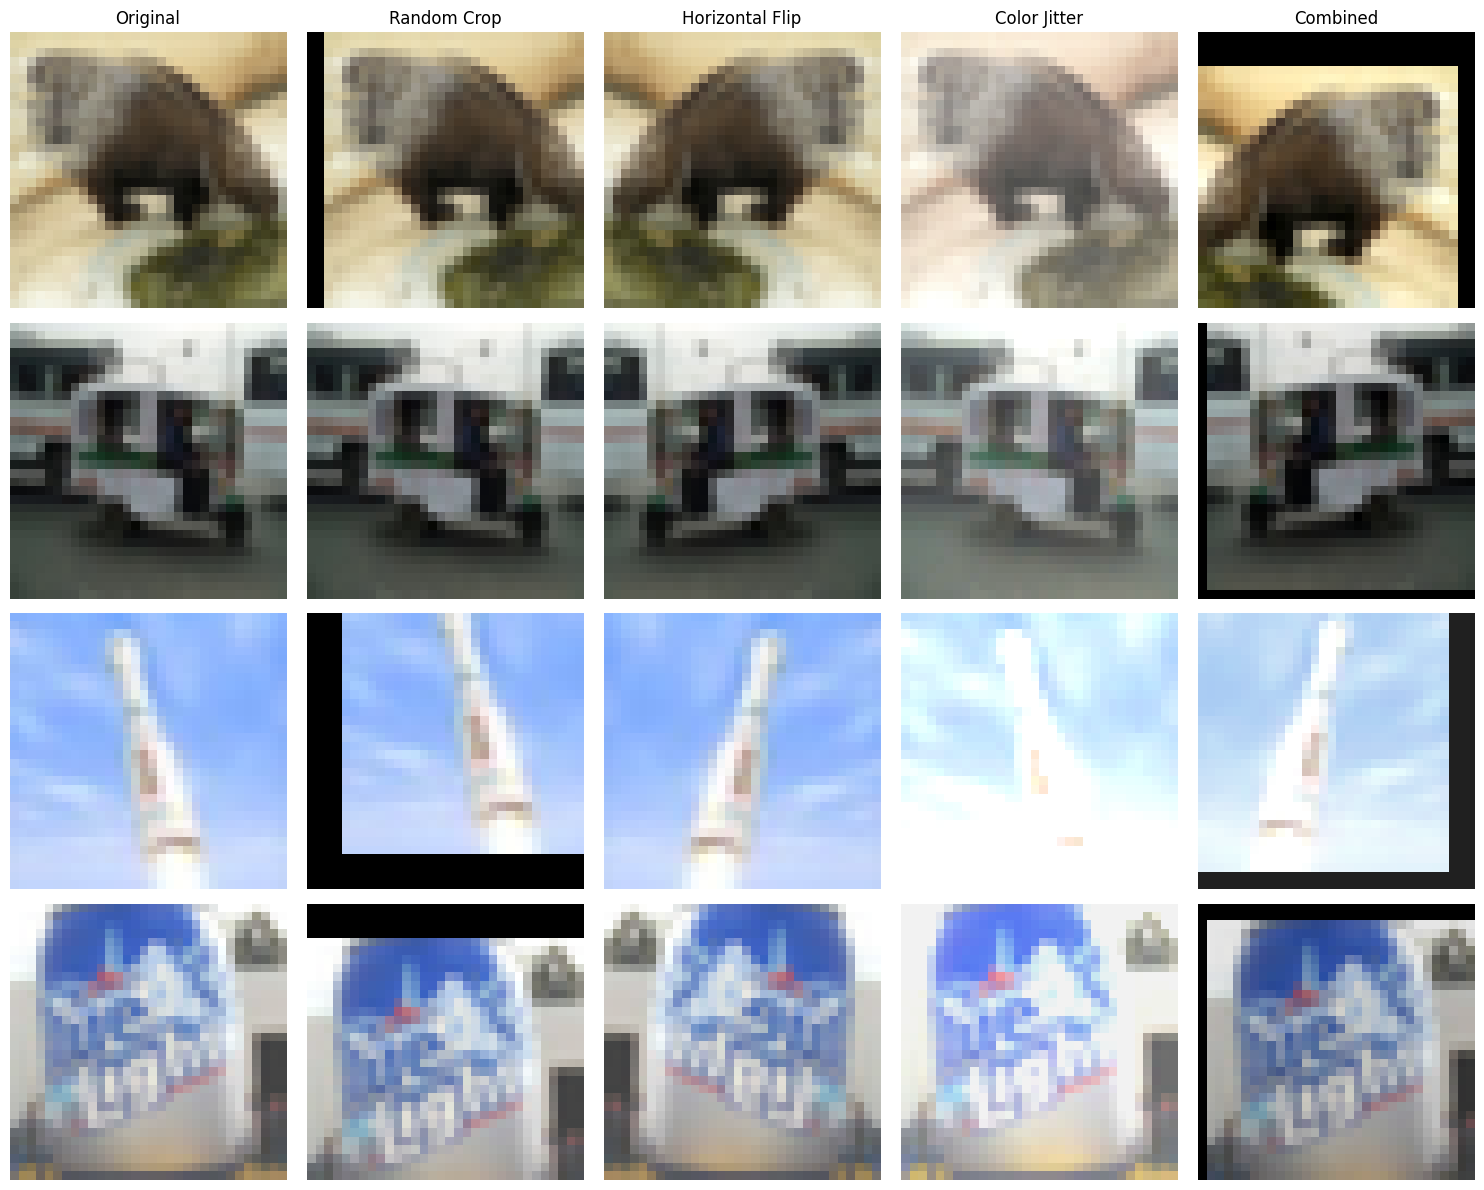

In [8]:
# Define different augmentation transforms
augmentations = {
    'Original': transforms.Compose([
        transforms.ToTensor()
    ]),
    'Random Crop': transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.ToTensor()
    ]),
    'Horizontal Flip': transforms.Compose([
        transforms.RandomHorizontalFlip(p=1.0),  # Always flip for demonstration
        transforms.ToTensor()
    ]),
    'Color Jitter': transforms.Compose([
        transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1),
        transforms.ToTensor()
    ]),
    'Combined': transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor()
    ])
}

# Get a batch of training data without transforms
raw_dataset = torchvision.datasets.CIFAR100(
    root='../data', 
    train=True,
    download=True, 
    transform=None  # No transforms
)

# Select a few images to demonstrate augmentation
num_images = 4
sample_indices = np.random.choice(len(raw_dataset), num_images, replace=False)
sample_images = [raw_dataset[i][0] for i in sample_indices]
sample_labels = [raw_dataset[i][1] for i in sample_indices]

# Apply each augmentation to the sample images
plt.figure(figsize=(15, num_images * 3))
col = 0

for aug_name, transform in augmentations.items():
    col += 1
    for i in range(num_images):
        plt.subplot(num_images, len(augmentations), (i * len(augmentations)) + col)
        
        # Apply the transform
        img = sample_images[i]
        img_tensor = transform(img)
        
        # Convert to numpy for display
        img_np = img_tensor.numpy().transpose((1, 2, 0))
        
        plt.imshow(img_np)
        if i == 0:
            plt.title(aug_name)
        if col == 1:
            plt.ylabel(classes[sample_labels[i]])
        plt.axis('off')

plt.tight_layout()
plt.savefig("../results/data_augmentation.png")
plt.show()

## 6. Summary

Let's summarize what we've learned about the CIFAR-100 dataset.

### Key Observations:

1. **Dataset Structure:**
   - 60,000 32x32 color images (50,000 training, 10,000 test)
   - 100 fine-grained classes organized into 20 superclasses
   - Each superclass contains 5 fine-grained classes
   - Dataset is balanced with 500 training images per class

2. **Image Characteristics:**
   - Small resolution (32x32 pixels)
   - RGB color format
   - Mean pixel values: [0.5071, 0.4867, 0.4408]
   - Standard deviation: [0.2675, 0.2565, 0.2761]

3. **Class Relationships:**
   - Classes within the same superclass share visual similarities
   - Some classes are visually more challenging to distinguish

4. **Data Augmentation:**
   - Random cropping, horizontal flipping, and color jittering can help increase model robustness
   - Appropriate data augmentation is crucial for small datasets like CIFAR-100

### Next Steps:

1. Implement and train various CNN architectures
2. Apply appropriate data augmentation based on our analysis
3. Pay special attention to superclass relationships when analyzing model performance
4. Consider hierarchical classification approaches that leverage the superclass structure